In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [22]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [23]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### Первый ряд - преступления в Бостоне

In [24]:
series_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


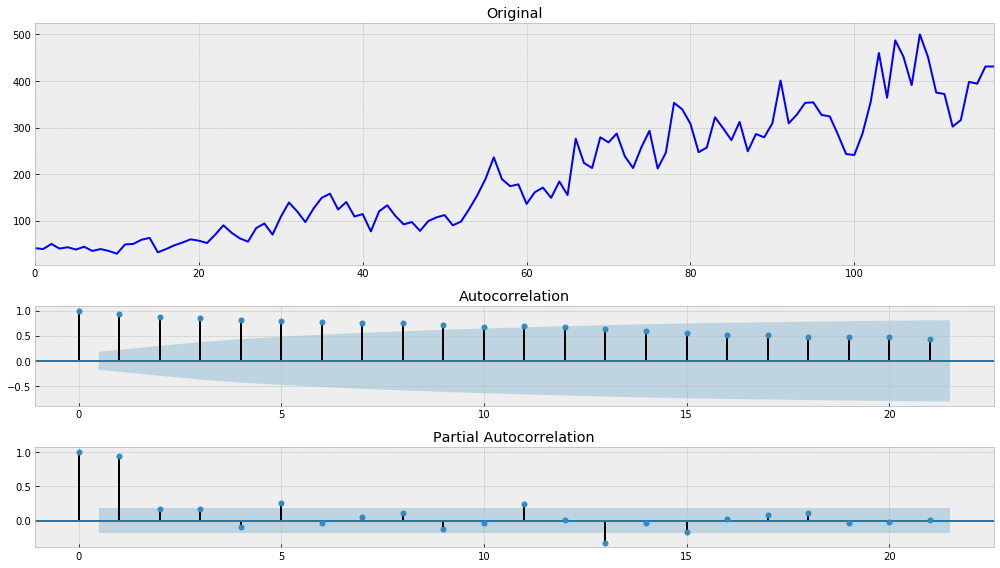

In [25]:
tsplot(series_boston)

На графике явно виден тренд, также наблюдается увеличение дисперсии. Ряд необходимо логарифмизировать преобразованием Бокса-Кокса и дифференцировать. 
Тест Дики-Фуллера подтверждает предположение - гипотеза о нестационарности ряда не отвергается, p-value почти равен 1.

In [26]:
series_boston = boxcox(series_boston, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


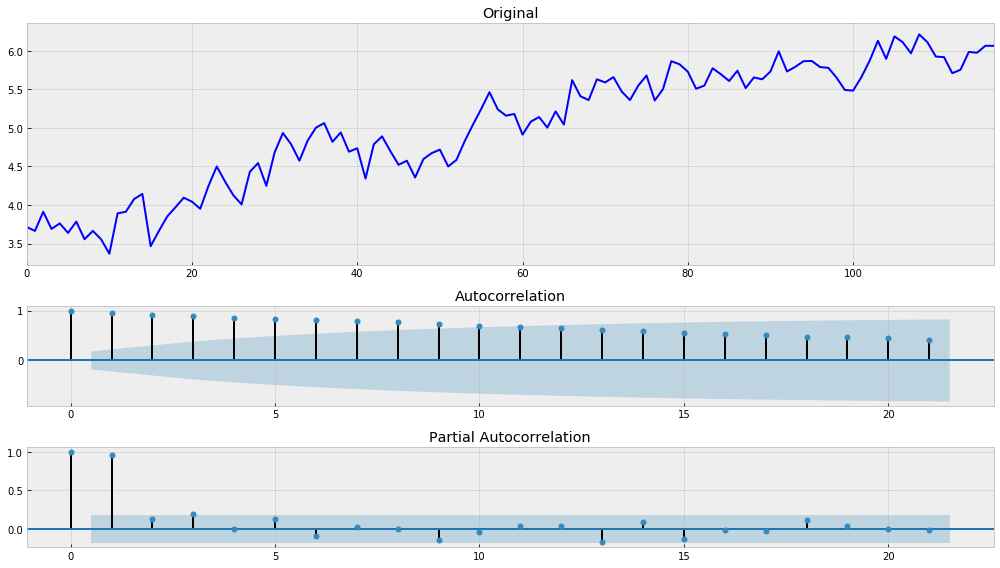

In [27]:
tsplot(series_boston)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда, p-value равен 0.28 что существенно больше 0.05 . По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [28]:
#просто дифференцирование в один шаг
series_boston = series_boston[1:] - series_boston[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


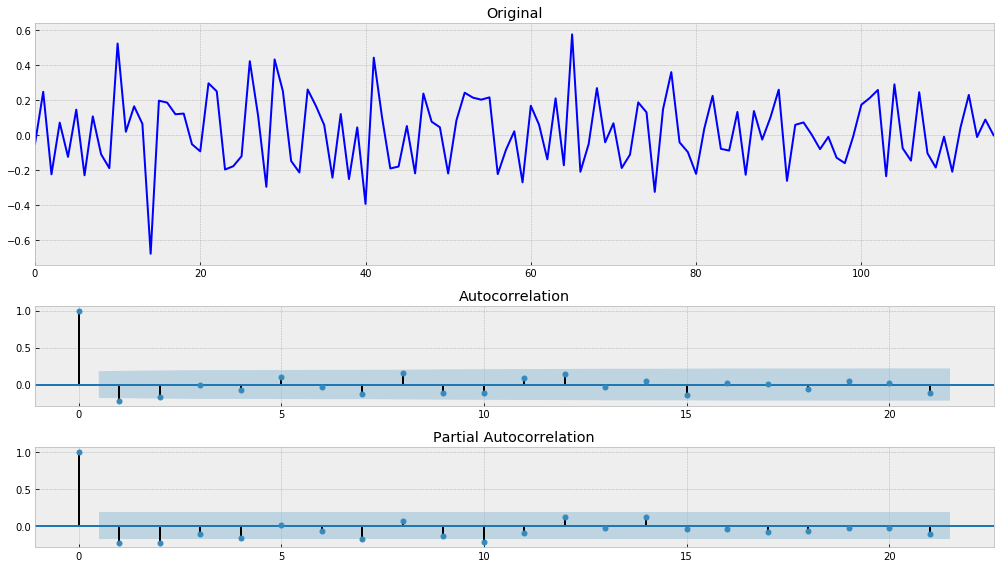

In [29]:
tsplot(series_boston)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда! p-value и t стремятся к нулю, на графике автокорреляции нет выбросов.

### Второй ряд - индекс Доу Джонс

In [75]:
series_dd = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


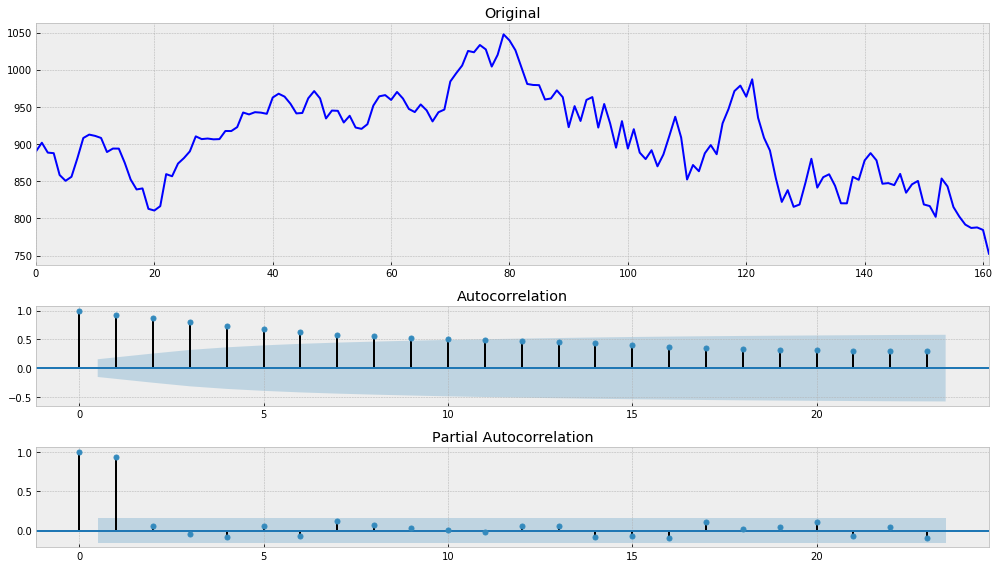

In [76]:
tsplot(series_dd)

p-value ниже чем у прошлого графика изначально, но тоже очень высок - 0.62 . На графике автокорреляции четко прослеживается нестационарность. Выровняем дисперсию преобразованием Бокса-Кокса

In [77]:
series_dd = boxcox(series_dd, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


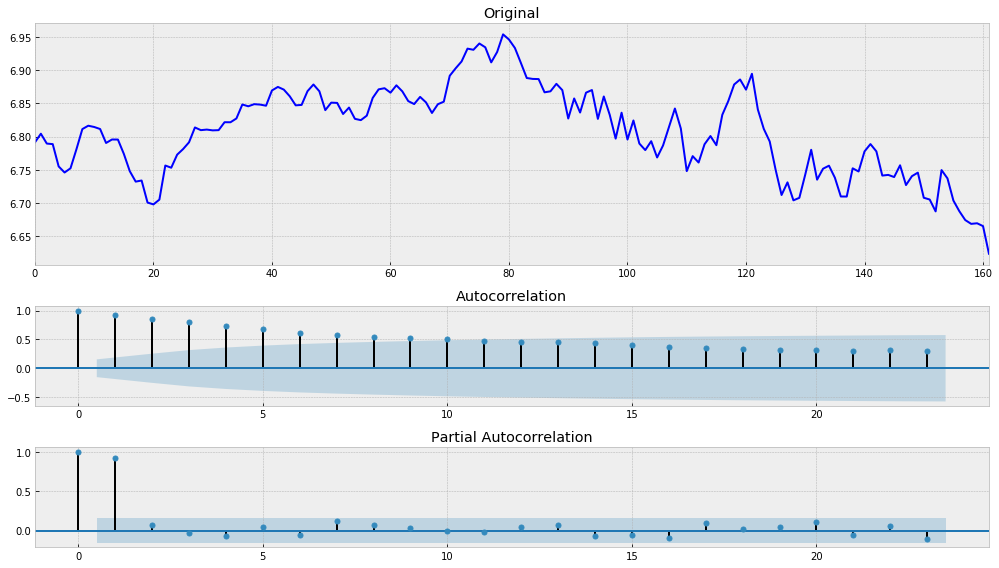

In [78]:
tsplot(series_dd)

Стало чуть хуже. Вернем старый график и приступим к дифференцированию.

In [114]:
series_dd = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

In [120]:
#почему-то не работал код дифференцирования из первого ряда. Сделал вручную
series_dd_ = []
n=1
for i in range(len(series_dd)-1):
    x = series_dd[n] - series_dd[n-1]
    series_dd_.append(x)
    n+=1

In [123]:
len(series_dd_)
#вроде бы то что нужно

161

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


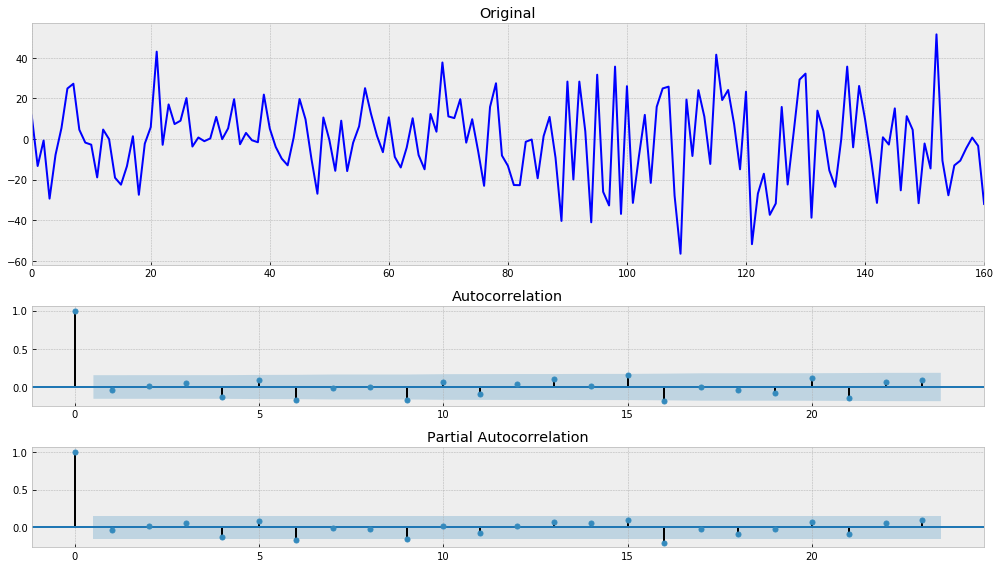

In [125]:
tsplot(series_dd_)

Тест Дики-Фуллера и визуальный анализ отвергают гипотезу о нестационарности ряда. Ряд стационарен! Без логарифмирования! :)